# <center> D9 - Practice Case 3: Natural Language Processing

Here in this notebook, we would like to do some analysis by using NLP and Web-Scrapping.

    Author: Tri Juliansyah M Sambas
    Date: 31st October 2019

## Import Libraries

In [151]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import time
from tqdm import tqdm_notebook as tqdm
import re, string, unicodedata

## Defining Functions

In [2]:
def html_check(website):
    response = requests.get(website, timeout = 10)
    html_text = bs(response.content, 'html.parser')
    
    return html_text

In [98]:
def scrapping_data_detik(website, tag, class_):
    response = requests.get(website, timeout = 30)
    html_text = bs(response.content, 'html.parser')
    
    # scrapping
    title = html_text.find('title')
    date = html_text.find('div', 'date').text
    content = [element.text for element in html_text.find_all(tag, class_)]
    
    return title,content,date

In [104]:
def scrapping_data(website, tag, class_):
    response = requests.get(website, timeout = 30)
    html_text = bs(response.content, 'html.parser')
    
    # scrapping
    title = html_text.find('title')
    content = [element.text for element in html_text.find_all(tag, class_)]
    
    return title,content

In [156]:
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')

## Web Scrapping: detik.com
### News Links Scrapping

In [5]:
query_links = []
page_length = 81
for i in np.arange(1, page_length):
    query_links.append('https://www.detik.com/search/searchnews?query=prabowo&sortby=time&page=%s' %i)

In [6]:
news_links = []
for link in tqdm(query_links, total=len(query_links), leave=False):    
    response = requests.get(link, timeout = 60)
    html_text = bs(response.content, 'html.parser')

    # scrapping all links in the page
    page_links = [] # clearing variable
    for element in html_text.find_all('a'):
        page_links.append(element.get('href'))
    
    # scrapping all news links in the page
    for element in page_links:
        if 'news.detik.com' in element:
            news_links.append(element)

### Contents Scrapping

In [7]:
websites = news_links

In [8]:
docs = []

# for detik.com
tag = 'div'
class_ ="itp_bodycontent detail_text"

for index, website in tqdm(enumerate(websites), total=len(websites), leave=False):
    doc = {}
    
    # scrapping title and content
    try:
        title, content, date = scrapping_data_detik(website, tag, class_)
        
        # assigning title & content..
        doc['id'] = index + 1
        doc['title'] = title.text.strip()
        doc['date'] = date
        doc['content'] = ''.join(element for element in content)
    except:
        title = None
        content = None
        date = None
        
        # assigning title & content..
        doc['title'] = title
        doc['date'] = date
        doc['content'] = content
    
    # saving doc..
    docs.append(doc)
    
# converting to dataframe
docs_df = pd.DataFrame(docs)
docs_df.head(3)

,content,date,id,title
0,\n\n\n\n\nJakarta -\n\t\t\t\t\t\t\t\t\t\t\tSua...,"Kamis 31 Oktober 2019, 15:40 WIB",1.0,"Penuh Tawa, Begini Akrabnya Prabowo-Sri Mulyan..."
1,\n\n\n\n\nJakarta -\n Presiden Joko Widodo (Jo...,"Kamis 31 Oktober 2019, 15:23 WIB",2.0,Suasana Hangat dan Hormat Prabowo ke Jokowi Sa...
2,,2019/10/31 14:32:15 WIB,3.0,PKB ke Menag: Apa Radikalisme Berhubungan deng...


### Quick Filtering

In [9]:
docs_df['content_length'] = docs_df['content'].apply(lambda x: len(x) if x != None else 0)

In [10]:
detik_df = docs_df.copy()
detik_df = detik_df[detik_df['content_length'] > 0]
detik_df.reset_index(drop = True, inplace = True)
detik_df['source'] = 'detikcom'
print(detik_df.shape)
detik_df.head(3)

(299, 6)


,content,date,id,title,content_length,source
0,\n\n\n\n\nJakarta -\n\t\t\t\t\t\t\t\t\t\t\tSua...,"Kamis 31 Oktober 2019, 15:40 WIB",1.0,"Penuh Tawa, Begini Akrabnya Prabowo-Sri Mulyan...",1472,detikcom
1,\n\n\n\n\nJakarta -\n Presiden Joko Widodo (Jo...,"Kamis 31 Oktober 2019, 15:23 WIB",2.0,Suasana Hangat dan Hormat Prabowo ke Jokowi Sa...,1847,detikcom
2,\n\n\n\n\nJakarta -\n\t\t\t\t\t\t\t\t\t\t\tPem...,"Kamis 31 Oktober 2019, 14:10 WIB",4.0,MenPAN-RB soal Penggunaan Cadar: Masing-masing...,2641,detikcom


In [19]:
# detik_df.to_csv('detikcom_prabowo.csv')

## Web Scrapping (thejakartapost.com) [NOT YET DONE]
### News Links Scrapping

In [188]:
# from selenium import webdriver      
# from selenium.common.exceptions import NoSuchElementException
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# import time

# url = "https://www.thejakartapost.com/search?q=prabowo"
# PATIENCE_TIME = 60

# driver = webdriver.Chrome('./chromedriver.exe')
# driver.get(url)

# while True:
#     try:
#         loadMoreButton = driver.find_element_by_css_selector(".btn.btn-lg.btn-xs-full.btn-load-more.margin-bottom-20")
#         print("Loading additional content....")
#         time.sleep(1)
#         driver.execute_script("arguments[0].click();", loadMoreButton)
#         time.sleep(3)
#     except Exception as e:
#         print(e)
#         break
# print ("Complete Loading All..")
# time.sleep(10)

In [136]:
# websites = ['https://www.thejakartapost.com/news/2019/10/29/prabowo-no-longer-barred-from-the-us-gerindra-executive.html',
#            'https://www.thejakartapost.com/news/2019/10/11/after-sby-jokowi-meets-with-prabowo-about-gerindras-chances-of-joining-the-new-cabinet.html',
#            'https://www.thejakartapost.com/news/2019/05/21/prabowo-to-challenge-election-results-at-constitutional-court.html',
#            'https://www.thejakartapost.com/news/2019/06/27/supreme-court-rejects-prabowo-teams-lawsuit-against-bawaslu.html']

In [187]:
# docs = []

# for index, website in tqdm(enumerate(websites), total=len(websites), leave=False):
#     doc = {}
    
#     # scrapping title and content
#     try:
#         response = requests.get(website, timeout = 30)
#         soup = bs(response.content, "html.parser")

#         title = soup.find('title').text.strip()
#         date = soup.find('span', {'class':"day"}).text.strip()
#         contents = soup.find("div", {'class':'col-md-10 col-xs-12 detailNews'}).find_all('p')
#         contents = [element.text for element in contents]
#         contents = ' '.join(contents)
        
#         # assigning title & content..
#         doc['id'] = index + 1
#         doc['title'] = title
#         doc['date'] = date
#         doc['content'] = contents
#     except:
#         title = None
#         content = None
#         date = None
        
#         # assigning title & content..
#         doc['title'] = title
#         doc['date'] = date
#         doc['content'] = content
    
#     # saving doc..
#     docs.append(doc)
    
# # converting to dataframe
# docs_df = pd.DataFrame(docs)
# docs_df

In [127]:
# web = 'https://www.thejakartapost.com/news/2019/10/29/prabowo-no-longer-barred-from-the-us-gerindra-executive.html'
# response = requests.get(web, timeout = 30)
# soup = bs(response.content, "html.parser")

# title = soup.find('title').text.strip()
# date = soup.find('span', {'class':"day"}).text.strip()
# contents = soup.find("div", {'class':'col-md-10 col-xs-12 detailNews'}).find_all('p')
# contents = [element.text for element in contents]
# contents = ' '.join(contents)

## Data Preprocessing
### Data Cleansing

In [14]:
#cleansing 
def preprocessing(text):
    def remove_between_square_brackets(text):
        return re.sub('-\[[^]]*\]', '', text)
    
    def denoise_text(text):
        text = strip_html(text)
        text = remove_between_square_brackets(text)
        return text
    
    def remove_punctuation(text):
        return re.sub(r'[^\w\s]', ' ', text)
    
    def remove_non_ascii(text):
        return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    def remove_new_page(text):
        return text.replace('\n','')
    
    def remove_tab(text):
        return text.replace('\t','')
    
    def findOccurrences(s, ch):
        return [i for i, letter in enumerate(s) if letter == ch]
    
    text = remove_between_square_brackets(text)
    text = remove_punctuation(text)
    text = remove_non_ascii(text)
    text = remove_new_page(text)
    text = remove_tab(text)
    
    # find google box text
    location = findOccurrences(text,'\r')
    if len(location) == 2:
        text = text[:location[0]] + text[location[1]+1:]
    
    # removing double spaces
    text = ' '.join(text.split())
    
    return text.lower()

In [15]:
detik_df['clean_content'] = detik_df['content'].apply(preprocessing)

### Content Translation 

In [16]:
from textblob import TextBlob

In [27]:
def translate_to_en(text):
    ina_text = TextBlob(text)
    return str(ina_text.translate(from_lang = 'id', to='en')).lower()

In [28]:
detik_df['en_content'] = detik_df['clean_content'].apply(translate_to_en)

In [29]:
detik_df.head(3)

,content,date,id,title,content_length,source,clean_content,en_content
0,\n\n\n\n\nJakarta -\n\t\t\t\t\t\t\t\t\t\t\tSua...,"Kamis 31 Oktober 2019, 15:40 WIB",1.0,"Penuh Tawa, Begini Akrabnya Prabowo-Sri Mulyan...",1472,detikcom,jakarta suasana akrab dan penuh tawa antarment...,jakarta a friendly and laughing atmosphere bet...
1,\n\n\n\n\nJakarta -\n Presiden Joko Widodo (Jo...,"Kamis 31 Oktober 2019, 15:23 WIB",2.0,Suasana Hangat dan Hormat Prabowo ke Jokowi Sa...,1847,detikcom,jakarta presiden joko widodo jokowi menggelar ...,jakarta president joko widodo jokowi held a li...
2,\n\n\n\n\nJakarta -\n\t\t\t\t\t\t\t\t\t\t\tPem...,"Kamis 31 Oktober 2019, 14:10 WIB",4.0,MenPAN-RB soal Penggunaan Cadar: Masing-masing...,2641,detikcom,jakarta pembahasan soal pelarangan cadar atau ...,jakarta discussion on the prohibition of veil ...


In [30]:
# saving to .csv file
detik_df.to_csv('detikcom_prabowo.csv')

### Language Preprocessing

In [38]:
from nltk.corpus import stopwords
from textblob import Word

In [39]:
#stopword 
stop = stopwords.words('english')
detik_df['en_content_proc'] = detik_df['en_content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [40]:
#lematization 
detik_df['en_content_proc']  = detik_df['en_content_proc'] .apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [186]:
detik_df['en_content_proc'][0]

"jakarta friendly laughing atmosphere indonesian cabinet minister seen limited meeting began today minister defense prabowo subianto even chance throw joke minister sri mulyani. moment began president joko widodo vice president ruf amin entered presidential office room jalan medan merdeka utara. jakarta pusat thursday 31 10 2019 prabowo sri mulyani sit row even though next other. also read cabinet, jokowi, sri mulyani prabowo, made fuss debt return seat, prabowo stood back asked minister finance sri mulyani take picture. jokowi come room said portrait pak prabowo pak sri mulyani said atmosphere meeting limited rengga sancaya detikcom see jokowi prabowo respectfully laughing said would always present called sri mulyani would called mrs. minister charge prabowo's warm respectful atmosphere jokowi perdanajokowi meeting minister also laughed loud time limited meeting still held meeting attended rank kemenko polhukam kemenko pmk fdu imk prabowo subiantosri mulyanimenhan prabowo subianto"

### Sentiment Labelling

In [143]:
text = detik_df['en_content_proc']
#looping 
for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    detik_df.loc[i,'sentiment'] = sentiment
    if sentiment < 0.0 :
        sentimentclass = 'Negative'
        detik_df.loc[i,'sentimentclass'] = sentimentclass
    elif sentiment > 0.0 :
        sentimentclass = 'Positive'
        detik_df.loc[i,'sentimentclass'] = sentimentclass
    else :
        sentimentclass = 'Neutral'
        detik_df.loc[i,'sentimentclass'] = sentimentclass

In [147]:
detik_df.head(3)

,content,date,id,title,content_length,source,clean_content,en_content,en_content_proc,sentiment,sentimentclass
0,\n\n\n\n\nJakarta -\n\t\t\t\t\t\t\t\t\t\t\tSua...,"Kamis 31 Oktober 2019, 15:40 WIB",1.0,"Penuh Tawa, Begini Akrabnya Prabowo-Sri Mulyan...",1472,detikcom,jakarta suasana akrab dan penuh tawa antarment...,jakarta a friendly and laughing atmosphere bet...,jakarta friendly laughing atmosphere indonesia...,0.116837,Positive
1,\n\n\n\n\nJakarta -\n Presiden Joko Widodo (Jo...,"Kamis 31 Oktober 2019, 15:23 WIB",2.0,Suasana Hangat dan Hormat Prabowo ke Jokowi Sa...,1847,detikcom,jakarta presiden joko widodo jokowi menggelar ...,jakarta president joko widodo jokowi held a li...,jakarta president joko widodo jokowi held limi...,-0.001531,Negative
2,\n\n\n\n\nJakarta -\n\t\t\t\t\t\t\t\t\t\t\tPem...,"Kamis 31 Oktober 2019, 14:10 WIB",4.0,MenPAN-RB soal Penggunaan Cadar: Masing-masing...,2641,detikcom,jakarta pembahasan soal pelarangan cadar atau ...,jakarta discussion on the prohibition of veil ...,jakarta discussion prohibition veil nikab gove...,0.096429,Positive


## Exploratory Data Analysis

In [223]:
import seaborn as sns

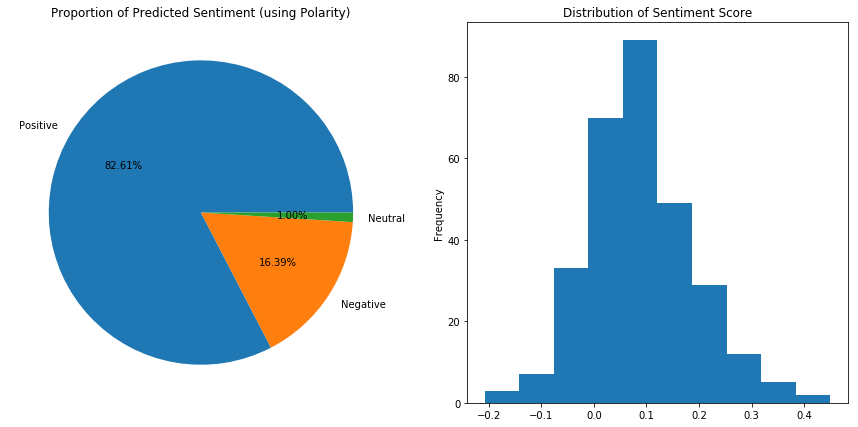

In [224]:
# Plotting
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.title('Proportion of Predicted Sentiment (using Polarity)')
detik_df['sentimentclass'].value_counts().plot.pie(autopct = '%.2f%%')
plt.ylabel(None)

plt.subplot(1,2,2)
plt.title('Distribution of Sentiment Score')
detik_df['sentiment'].plot.hist()
plt.show()

In [225]:
detik_df['words_count'] = detik_df['clean_content'].apply(str.split).apply(len)

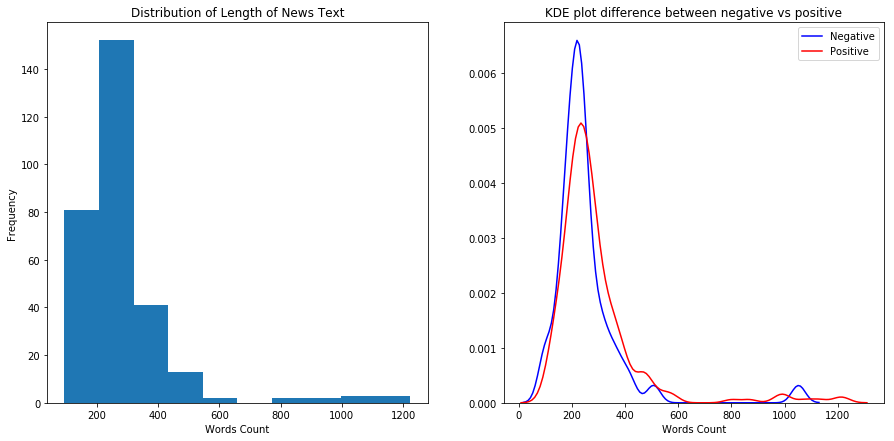

In [226]:
# Plotting
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.title('Distribution of Length of News Text')
detik_df['words_count'].plot.hist()
plt.xlabel('Words Count')

plt.subplot(1,2,2)
plt.title('KDE plot difference between negative vs positive')
sns.kdeplot(detik_df.loc[detik_df['sentimentclass'] == 'Negative','words_count'], color = 'blue')
sns.kdeplot(detik_df.loc[detik_df['sentimentclass'] == 'Positive','words_count'], color = 'red')
plt.legend(labels = ['Negative', 'Positive'])
plt.xlabel('Words Count')
plt.show()

In [227]:
negative_content = detik_df[detik_df['sentimentclass'] == 'Negative']['en_content_proc']
positive_content = detik_df[detik_df['sentimentclass'] == 'Positive']['en_content_proc']

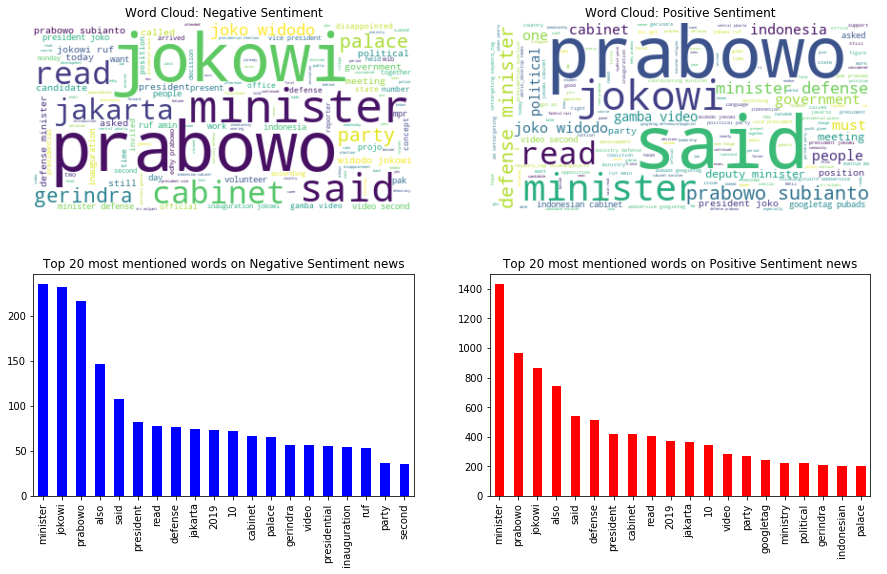

In [228]:
negative_text = ' '.join(negative_content)
positive_text = ' '.join(positive_content)
neg_df = pd.DataFrame({'column':negative_text.split()})
pos_df = pd.DataFrame({'column':positive_text.split()})

# Plotting
plt.figure(figsize = (15,9))
plt.subplot(2,2,1)
plt.title('Word Cloud: Negative Sentiment')
create_word_cloud(negative_text)

plt.subplot(2,2,2)
plt.title('Word Cloud: Positive Sentiment')
create_word_cloud(positive_text)

plt.subplot(2,2,3)
plt.title('Top 20 most mentioned words on Negative Sentiment news')
neg_df['column'].value_counts()[:20].plot.bar(color = 'blue')

plt.subplot(2,2,4)
plt.title('Top 20 most mentioned words on Positive Sentiment news')
pos_df['column'].value_counts()[:20].plot.bar(color = 'red')
plt.show()

## Feature Extraction

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
count_vectorizer = CountVectorizer(stop_words='english')

In [71]:
tfidf = TfidfVectorizer(stop_words='english')

### Fit & Transform

In [72]:
X = detik_df['en_content_proc']
y = detik_df['sentimentclass']

In [73]:
#countvectorizer
X_vectorizer = count_vectorizer.fit_transform(X)

#tfidf vectorizer
X_tfidf = tfidf.fit_transform(X)

## Modeling
### Train-Test Data Split

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
#train test split using countvectorizer 
train_X_vectorizer, test_X_vectorizer, train_y, test_y = train_test_split(X_vectorizer, y, test_size=0.2, random_state=1234)

#train test split using tfidfvectorizer 
train_X_tfidf, test_X_tfidf, train_y, test_y = train_test_split(X_tfidf, y, test_size=0.2, random_state=1234)

### Machine Learning Model

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
# Countvectorizer 
Lr_vect = LogisticRegression()
Lr_vect.fit(train_X_vectorizer,train_y)
Lr_pred_vect_train = Lr_vect.predict(train_X_vectorizer)
Lr_pred_vect_test = Lr_vect.predict(test_X_vectorizer)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [78]:
# TFIDFVectorizer
Lr_tfidf = LogisticRegression()
Lr_tfidf.fit(train_X_tfidf,train_y)
Lr_pred_tfidf_train = Lr_tfidf.predict(train_X_tfidf)
Lr_pred_tfidf_test = Lr_tfidf.predict(test_X_tfidf)

### Evaluation 

In [79]:
#import sklearn for model evaluation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [80]:
# using count vectorizer
print("______________ Countvectorizer ______________")

Lr_clf_vec_report_train = classification_report(train_y, Lr_pred_vect_train)
Lr_clf_vec_report_test = classification_report(test_y, Lr_pred_vect_test)

Lr_confmatrix_vect_train = confusion_matrix(train_y, Lr_pred_vect_train) 
Lr_confmatrix_vect_test = confusion_matrix(test_y, Lr_pred_vect_test)

Lr_recall_vec_train = recall_score(train_y, Lr_pred_vect_train, average="micro")
Lr_recall_vec_test = recall_score(test_y, Lr_pred_vect_test,average="micro") 

Lr_precision_vec_train = precision_score(train_y, Lr_pred_vect_train,average="micro")
Lr_precision_vec_test = precision_score(test_y, Lr_pred_vect_test,average="micro")

Lr_f1_score_vec_train = f1_score(train_y, Lr_pred_vect_train,average="micro")
Lr_f1_score_vec_test = f1_score(test_y,Lr_pred_vect_test,average="micro")

print('Information :')
print('Confusion matrix for Train :')
print(Lr_confmatrix_vect_train,'\n')
print('Confusion matrix for Test :')
print(Lr_confmatrix_vect_test,'\n')
print('Classification Report for Train :')
print(Lr_clf_vec_report_train,'\n')
print('Classification Report for Test :')
print(Lr_clf_vec_report_test,'\n')
print('Recall train & test     : %.2f%%' % (Lr_recall_vec_train * 100), '&', '%.2f%%' % (Lr_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_vec_train * 100), '&', '%.2f%%' % (Lr_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_vec_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Confusion matrix for Train :
[[ 37   0   0]
 [  0 103   0]
 [  0   0  99]] 

Confusion matrix for Test :
[[ 2  6  4]
 [ 2 14  7]
 [ 1 12 12]] 

Classification Report for Train :
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        37
     Neutral       1.00      1.00      1.00       103
    Positive       1.00      1.00      1.00        99

   micro avg       1.00      1.00      1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239
 

Classification Report for Test :
              precision    recall  f1-score   support

    Negative       0.40      0.17      0.24        12
     Neutral       0.44      0.61      0.51        23
    Positive       0.52      0.48      0.50        25

   micro avg       0.47      0.47      0.47        60
   macro avg       0.45      0.42      0.41        60
weighted avg       0

In [81]:
# using count vectorizer
print("______________ TF-IDF ______________")


Lr_recall_tfidf_train = recall_score(train_y, Lr_pred_tfidf_train, average="micro")
Lr_recall_tfidf_test = recall_score(test_y, Lr_pred_tfidf_test,average="micro") 

Lr_precision_tfidf_train = precision_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_precision_tfidf_test = precision_score(test_y, Lr_pred_tfidf_test,average="micro")

Lr_f1_score_tfidf_train = f1_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_f1_score_tfidf_test = f1_score(test_y,Lr_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (Lr_recall_tfidf_train * 100), '&', '%.2f%%' % (Lr_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_tfidf_train * 100), '&', '%.2f%%' % (Lr_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_tfidf_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Recall train & test     : 84.10% & 45.00%
Precision train & test  : 84.10% & 45.00%
F1 Score train & test   : 84.10% & 46.67%


In [82]:
test_X_vectorizer

<60x7139 sparse matrix of type '<class 'numpy.int64'>'
	with 7435 stored elements in Compressed Sparse Row format>

In [83]:
test_y.value_counts()

Positive    25
Neutral     23
Negative    12
Name: sentimentclass, dtype: int64